In [0]:
!unzip control.zip
!unzip condition.zip

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

path = '/content/control/'
file = path + 'control_2.csv'

control = pd.read_csv(file)

activity = control.activity
activity = activity.astype('float32')
index = range(0, len(activity))

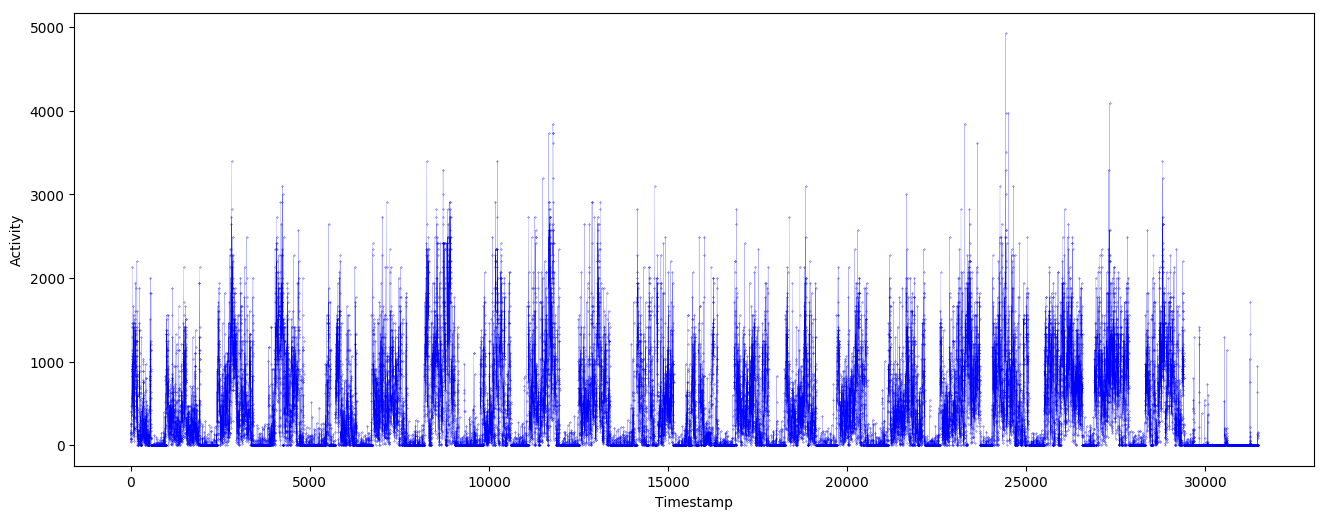

In [31]:
# Plot of the loaded data

plt.figure(num=1, figsize=(16, 6), dpi=100, facecolor='w', edgecolor='b')
plt.plot(index, activity, marker='.', color='b', linewidth='0.1', markersize=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.show()

In [0]:
from numpy import array

# Split a univariate sequence
def split_sequence(sequence, n_steps):
  '''
  Args:
    Sequence: The time series that is to  be split
    n_steps: How many steps of the time series should be used
  '''
  
  X, y = list(), list()
  for i in range(len(sequence)):
    # Find the end of this pattern
    end_ix = i + n_steps
    # Check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # Gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


def network(n_steps, n_features):
  model = Sequential()
  model.add(LSTM(25, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
  model.add(LSTM(50, activation='relu', return_sequences=True))
  model.add(LSTM(25, activation='relu'))
  model.add(Dense(1, activation='relu'))
  model.compile(optimizer='adam', loss='mse')
  
  return model

In [0]:
#activity_norm = activity/max(activity)
raw_seq = activity

# Choose a number of time steps
n_steps = 5

# Split into samples
X, y = split_sequence(raw_seq, n_steps)

# Reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [0]:
# Load the model
model = network(n_steps, n_features)

# Defining empty prediction array
yhat = np.zeros(len(raw_seq)-250, dtype=float)

# Train on the first 250 samples and save the model
epochs = 3
model.fit(X[0:249], y[0:249], epochs=epochs, verbose=0)
model.save("LSTM.h5")

In [38]:
import math

count = 0
error = np.zeros(len(raw_seq)-250, dtype=float)
#batch_err = np.zeros((math.ceil((len(X)-250)/250)), dtype=float)
#
#
# make sure that no predciction is on trained data
#
#
for i in range(250, len(X)):
  
  # Make a prediction on the next 250 samples
  x_input = array(X[i])
  x_reshape = x_input.reshape((1, n_steps, n_features))
  yhat[i-250] = model.predict(x_reshape, verbose=0)
  
  '''
  Possible to make an if to avoid predictid negative activity
  '''
  
  error[i-250] = abs(yhat[i-250] - raw_seq[i])
  
  if i % 250 == 0:
    # When 250 new samples are seen, train the model again
    # with the added 250 samples.
    count += 1
    print("Fitting ... " + str(count) + "/" + str(math.ceil((len(X)-250)/250)))
    model.fit(X[i:i+249], y[i:i+249], epochs=epochs, verbose=0)
    model.save("LSTM.h5")
    #batch_err[count-1] = sum(error[i-250:i])/sum(raw_seq[i:i+250])

Fitting ... 1/125
Fitting ... 2/125
Fitting ... 3/125
Fitting ... 4/125
Fitting ... 5/125
Fitting ... 6/125
Fitting ... 7/125
Fitting ... 8/125
Fitting ... 9/125
Fitting ... 10/125
Fitting ... 11/125
Fitting ... 12/125
Fitting ... 13/125
Fitting ... 14/125
Fitting ... 15/125
Fitting ... 16/125
Fitting ... 17/125
Fitting ... 18/125
Fitting ... 19/125
Fitting ... 20/125
Fitting ... 21/125
Fitting ... 22/125
Fitting ... 23/125
Fitting ... 24/125
Fitting ... 25/125
Fitting ... 26/125
Fitting ... 27/125
Fitting ... 28/125
Fitting ... 29/125
Fitting ... 30/125
Fitting ... 31/125
Fitting ... 32/125
Fitting ... 33/125
Fitting ... 34/125
Fitting ... 35/125
Fitting ... 36/125
Fitting ... 37/125
Fitting ... 38/125
Fitting ... 39/125
Fitting ... 40/125
Fitting ... 41/125
Fitting ... 42/125
Fitting ... 43/125
Fitting ... 44/125
Fitting ... 45/125
Fitting ... 46/125
Fitting ... 47/125
Fitting ... 48/125
Fitting ... 49/125
Fitting ... 50/125
Fitting ... 51/125
Fitting ... 52/125
Fitting ... 53/125
Fi

In [0]:
yhat_n = yhat * max(activity)

In [0]:
index_y = range(250, len(yhat)+250)

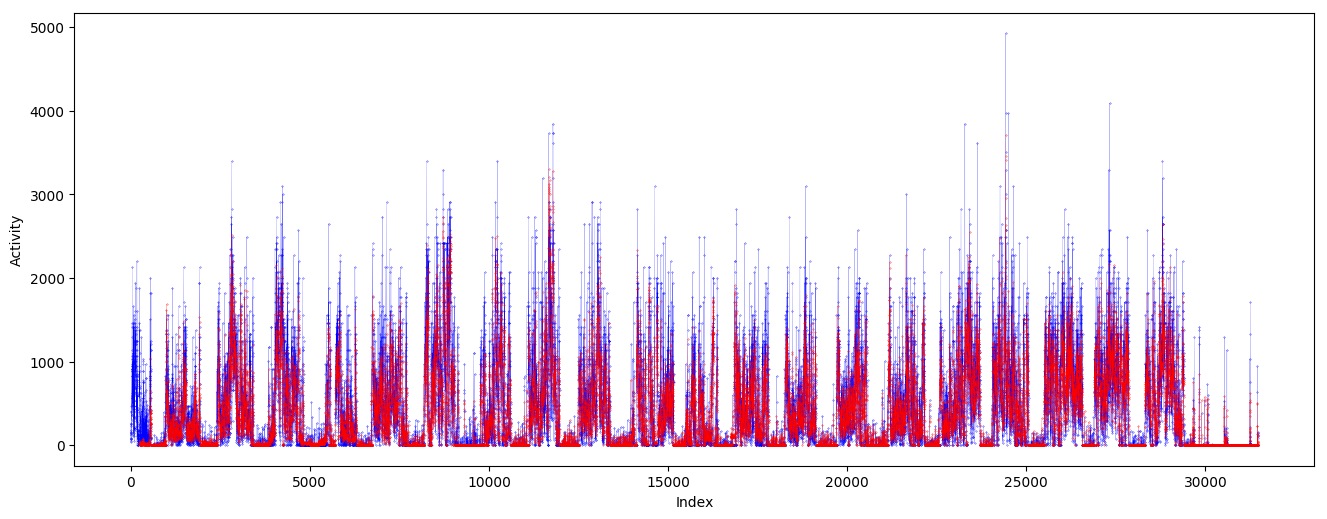

In [41]:
# Plotting the full dataseries and prediction

plt.figure(num=1, figsize=(16, 6), dpi=100, facecolor='w', edgecolor='b')
plt.plot(index, activity, marker='.', color='b', linewidth='0.1', markersize=0.5)
plt.plot(index_y, yhat, marker='.', color='r', linewidth='0.1', markersize=0.5)
plt.xlabel('Index')
plt.ylabel('Activity')
plt.savefig('fig.eps', format='eps')
plt.show()

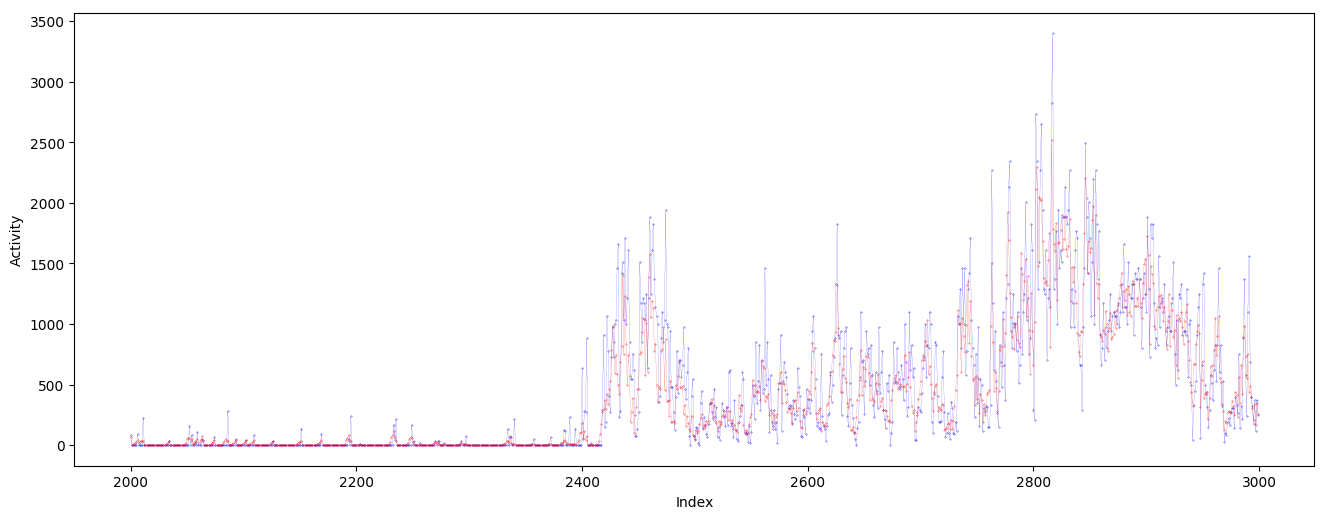

In [45]:
# Plotting 1000 samples of the dataseries and prediction

plt.figure(num=1, figsize=(16, 6), dpi=100, facecolor='w', edgecolor='b')
plt.plot(index[2000:3000], activity[2000:3000], marker='.', color='b', linewidth='0.1', markersize=0.5)
plt.plot(index_y[1750:2750], yhat[1750:2750], marker='.', color='r', linewidth='0.1', markersize=0.5)
plt.xlabel('Index')
plt.ylabel('Activity')
plt.savefig('fig_1000.eps', format='eps')
plt.show()

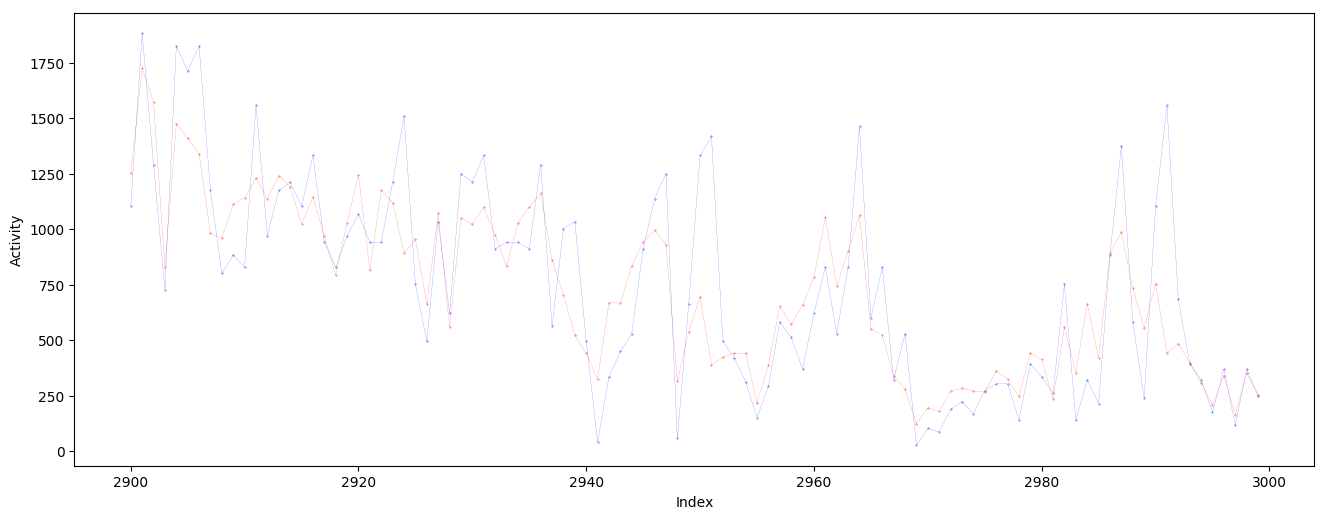

In [44]:
# Plotting 100 samples of the dataseries and prediction

plt.figure(num=1, figsize=(16, 6), dpi=100, facecolor='w', edgecolor='b')
plt.plot(index[2900:3000], activity[2900:3000], marker='.', color='b', linewidth='0.1', markersize=0.5)
plt.plot(index_y[2650:2750], yhat[2650:2750], marker='.', color='r', linewidth='0.1', markersize=0.5)
plt.xlabel('Index')
plt.ylabel('Activity')
plt.savefig('fig_100.eps', format='eps')
plt.show()

In [46]:
print("MAPE: " + str(sum(error)/sum(raw_seq[250:len(raw_seq)])))

MAPE: 0.4523304271691529
